# Custom Packet Test

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/test_custom_packet.csv",usecols=[1,2],header=None) #Don't need packet #
data = data[data[1].str.contains("energy")] #Don't need non-energy rows
data = data[data[2] != 0] #0's are unplugged channels.

data_i50 = pd.read_csv("data/test_custom_packet_I50.csv",header=None,usecols=[1,2]) #Don't need packet #
data_i50 = data_i50[data_i50[1].str.contains("energy")] #Don't need non-energy rows
data_i50 = data_i50[data_i50[2] != 0] #0's are unplugged channels.

data_b230 = pd.read_csv("data/test_custom_packet_baseline230.csv")#,usecols=["word label","value"])
data_b230 = data_b230[data_b230[" word label"].str.contains("energy")]
data_b230 = data_b230[data_b230[" value"] != 0]

data_b0 = pd.read_csv("data/test_custom_packet_baseline0.csv")
data_b0 = data_b0[data_b0["word label"].str.contains("energy")]
data_b0 = data_b0[data_b0["value"] != 0]

data_def = pd.read_csv("data/test_custom_packet_defaults.csv")
data_b0 = data_b0[data_b0["word label"].str.contains("energy")]
data_b0 = data_b0[data_b0["value"] != 0]

data_no = pd.read_csv("data/test_custom_packet_b230_nosource.csv",usecols=["word label","value"])
data_no = data_no[data_no["word label"].str.contains("energy")]
data_no = data_no[data_no["value"] != 0]

data_low = pd.read_csv("data/test_custom_packet_l300keV_nosource.csv",usecols=["word label","value"])
data_low = data_low[data_low["word label"].str.contains("energy")]
data_low = data_low[data_low["value"] != 0]

data_lowNa = pd.read_csv("data/test_custom_packet_l300keV_Na_longrun.csv",usecols=["word label","value"])
data_lowNa = data_lowNa[data_lowNa["word label"].str.contains("energy_ch_2[2-3]")]
#data_lowNa = data_lowNa[data_lowNa["value"] != 0] #well that turns out to be something of a problem >_>

Note: all 0's recorded were explicitly discarded as they represent channels that are not plugged in in the firmware diagram.

In [3]:
np.mean(data[data[1].str.contains("8")][2]) - np.mean(data_b230[data_b230[" word label"].str.contains("8")][" value"])

55794.39793550811

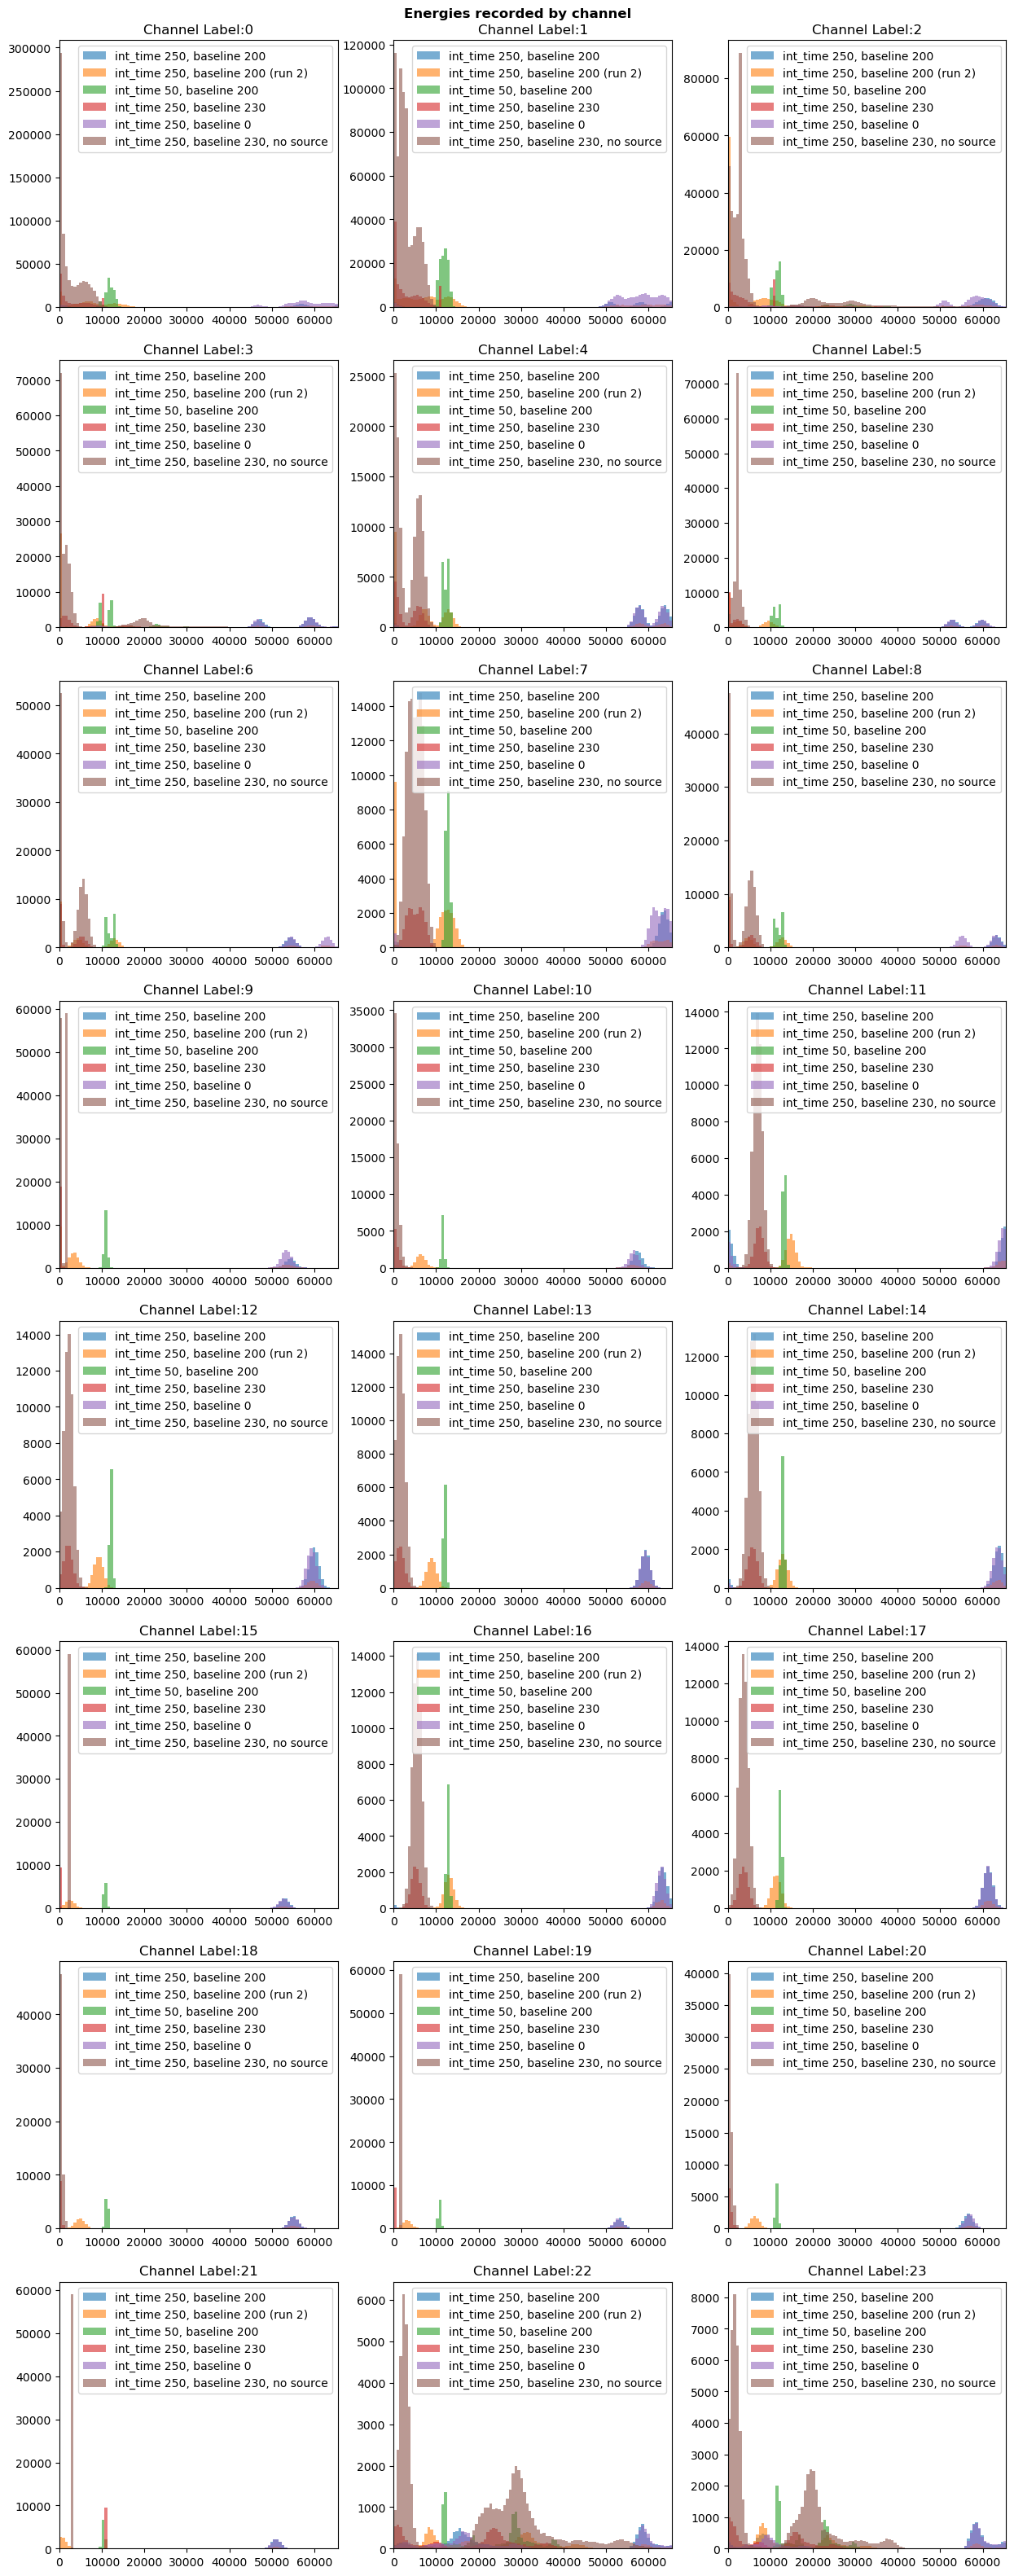

In [4]:
fig, ax = plt.subplots(nrows=math.ceil((27-4)/3),ncols=3,figsize=(15,5*math.ceil((27-4)/3)))

bins = np.linspace(0,65536,100)

for i in range(27-4+1):
    row = math.floor(i/3)
    current_ax = ax[row][i%3]
    current_ax.set_title('Channel Label:'+str(i))
    current_ax.hist(data[data[1].str.contains(str(i+4))][2],alpha=0.6,bins=bins,label="int_time 250, baseline 200")
    current_ax.hist(data_def[data_def["word label"].str.contains(str(i))]["value"],alpha=0.6,bins=bins,label="int_time 250, baseline 200 (run 2)")
    current_ax.hist(data_i50[data_i50[1].str.contains(str(i))][2],alpha=0.6,bins=bins,label="int_time 50, baseline 200")
    current_ax.hist(data_b230[data_b230[" word label"].str.contains(str(i))][" value"],alpha=0.6,bins=bins,label="int_time 250, baseline 230")
    current_ax.hist(data_b0[data_b0["word label"].str.contains(str(i))]["value"],alpha=0.6,bins=bins,label="int_time 250, baseline 0")
    current_ax.hist(data_no[data_no["word label"].str.contains(str(i))]["value"],alpha=0.6,bins=bins,label="int_time 250, baseline 230, no source")
    current_ax.legend()
    current_ax.set_xlim(min(bins),max(bins))

plt.suptitle('Energies recorded by channel',weight='bold',y=0.89)
plt.show()

Text(0.5, 0.98, 'Energies recorded, baseline 230, int_time 250')

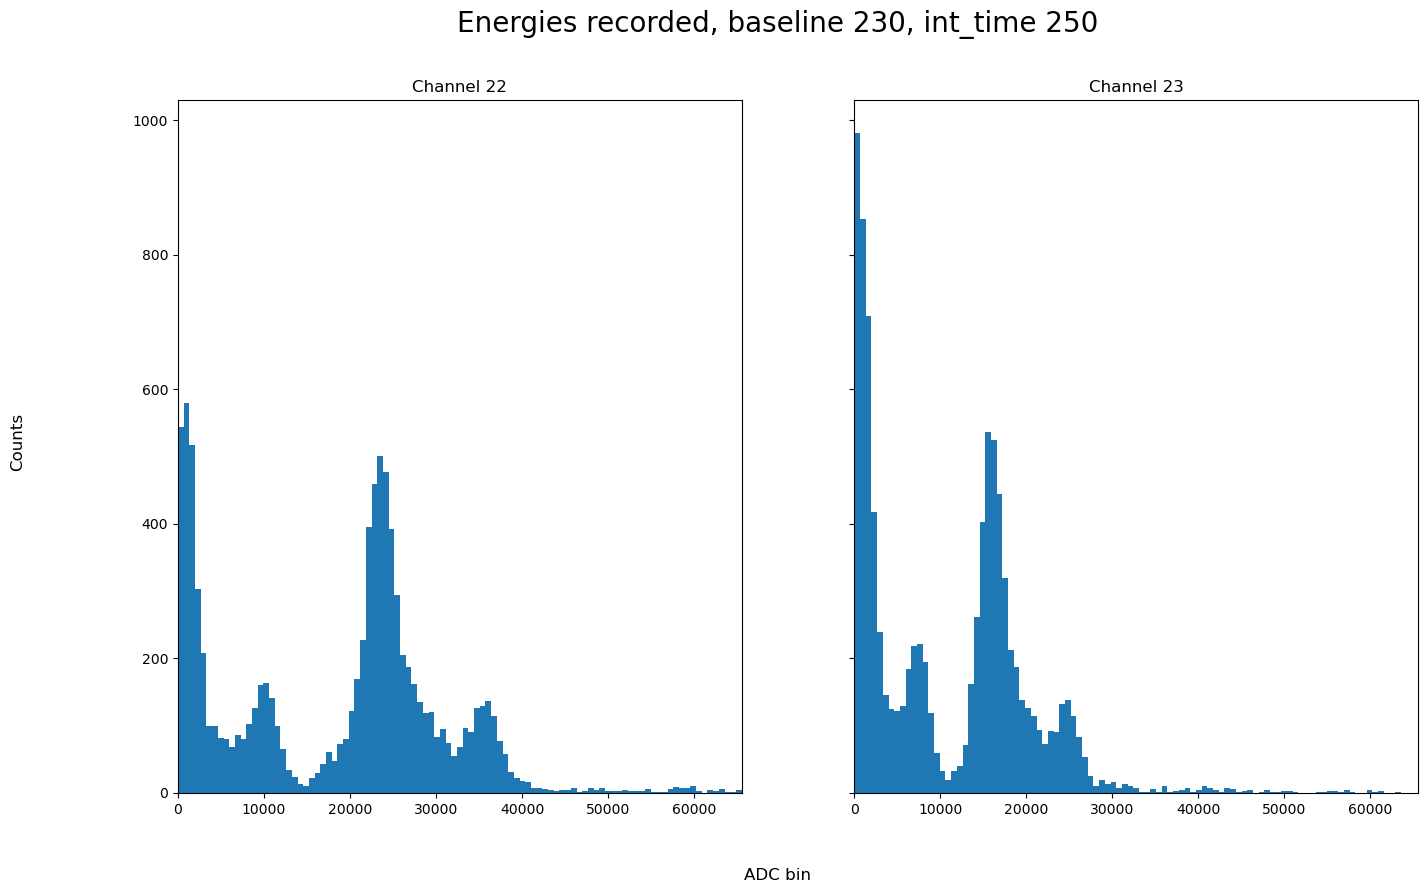

In [5]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(16,9))

ax[0].hist(data_b230[data_b230[" word label"].str.contains("22")][" value"],bins=bins)
ax[1].hist(data_b230[data_b230[" word label"].str.contains("23")][" value"],bins=bins)
ax[0].set_title("Channel 22"); ax[1].set_title("Channel 23")

ax[0].set_xlim(min(bins),max(bins))
ax[1].set_xlim(min(bins),max(bins))

fig.supxlabel("ADC bin")
fig.supylabel("Counts")
plt.suptitle("Energies recorded, baseline 230, int_time 250",size=20)

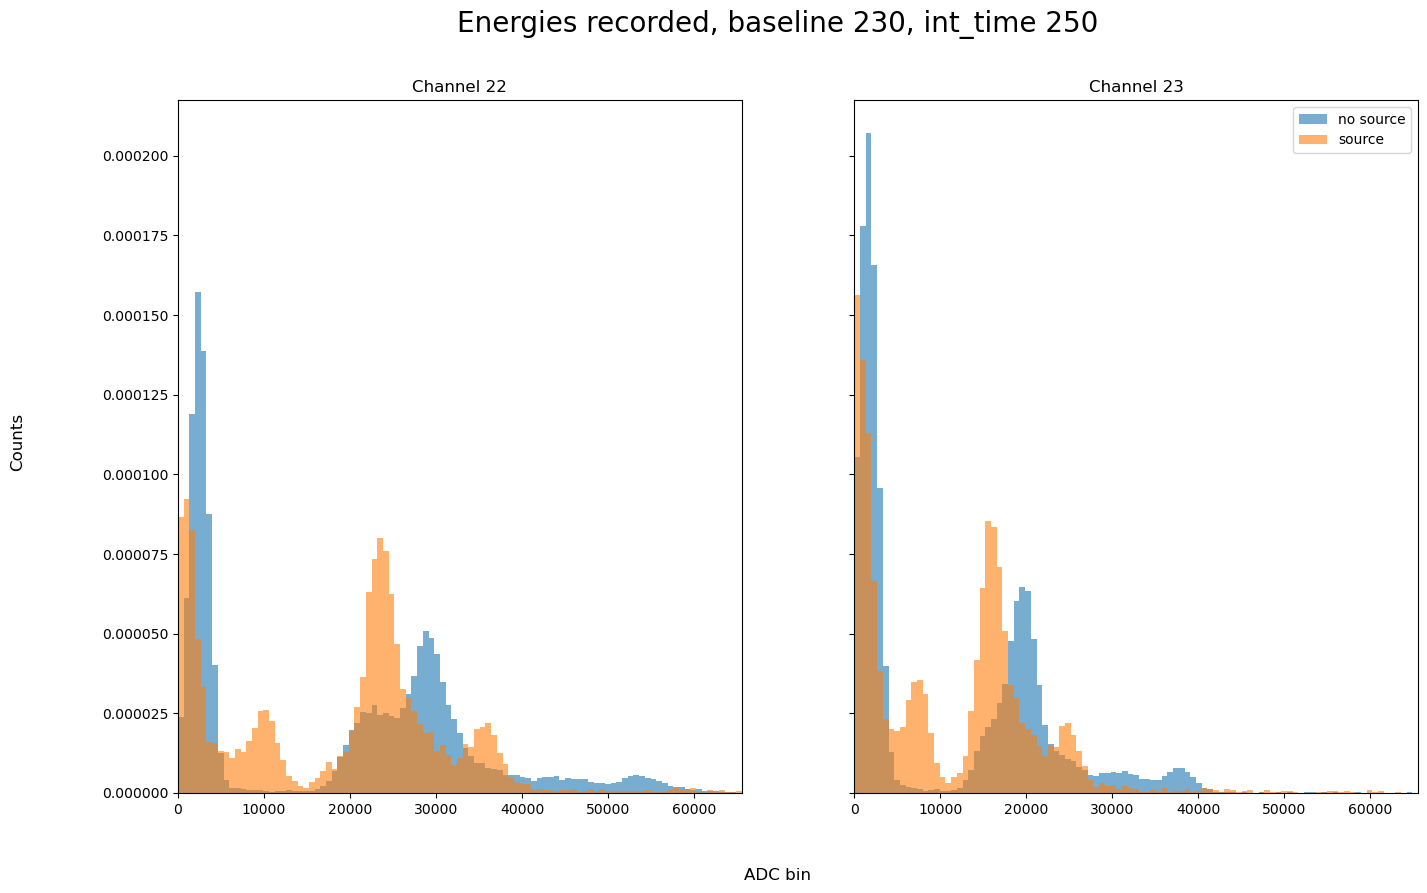

In [6]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(16,9))

det22 = data_b230[data_b230[" word label"].str.contains("22")][" value"]
det23 = data_b230[data_b230[" word label"].str.contains("23")][" value"]

ax[0].hist(data_no[data_no["word label"].str.contains("22")]["value"],bins=bins,alpha=0.6,label="no source",density=True)
h22 = ax[0].hist(det22,bins=bins,alpha=0.6,label="source",density=True)
ax[1].hist(data_no[data_no["word label"].str.contains("23")]["value"],bins=bins,alpha=0.6,label="no source",density=True)
h23 = ax[1].hist(det23,bins=bins,alpha=0.6,label="source",density=True)
ax[0].set_title("Channel 22"); ax[1].set_title("Channel 23")

ax[0].set_xlim(min(bins),max(bins))
ax[1].set_xlim(min(bins),max(bins))

fig.supxlabel("ADC bin")
fig.supylabel("Counts")
plt.legend()
plt.suptitle("Energies recorded, baseline 230, int_time 250",size=20)
plt.show()

In [7]:
h22x = (h22[1][:-1] + h22[1][1:])/2
lo22 = h22x[h22[0] == max(h22[0][(h22x > 5000) & (h22x < 20000)])]
hi22 = h22x[h22[0] == max(h22[0][h22x > 15000])]
print(lo22/hi22)

h23x = (h23[1][:-1] + h23[1][1:])/2
lo23 = h23x[h23[0] == max(h23[0][(h23x > 5000) & (h23x < 10000)])]
hi23 = h23x[h23[0] == max(h23[0][h23x > 15000])]
print(lo23/hi23)

print(510/1200)

[0.43661972]
[0.4893617]
0.425


In [8]:
file = pd.read_csv("data/test_custom_packet_baseline230.csv",usecols=[" word label"," value"])
file = file[file[" word label"].str.contains("trig")]
print(len(file[file[" value"] > 2]))

0


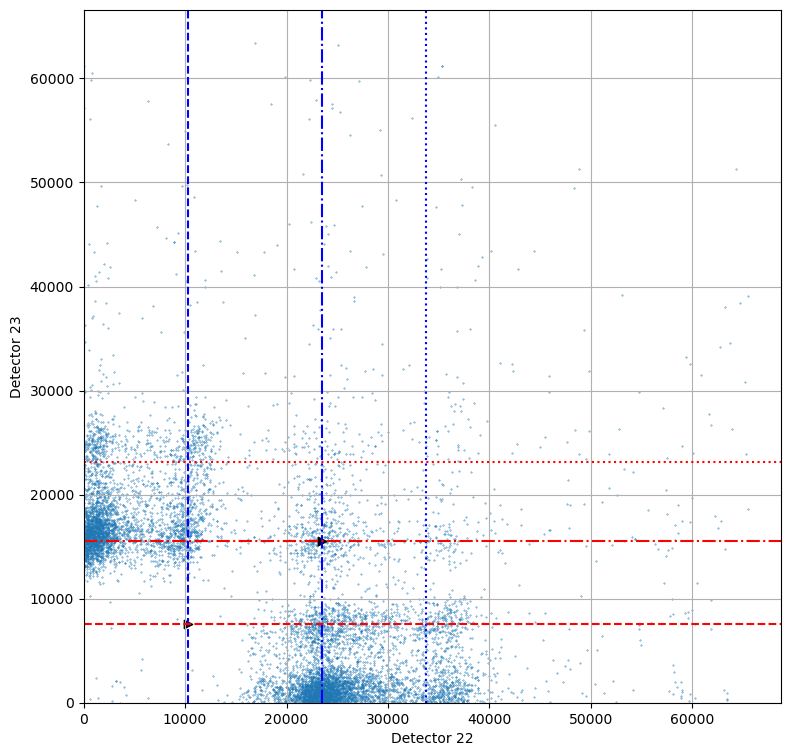

In [9]:
fig = plt.figure(figsize=(9,9))
plt.scatter(det22,det23,s=0.1,label="Data")
plt.axvline(lo22,linestyle='--',color='b')
plt.axvline(hi22,linestyle='-.',color='b')
plt.axvline(lo22+hi22,linestyle=':',color='b')
plt.axhline(lo23,linestyle='--',color='r')
plt.axhline(hi23,linestyle='-.',color='r')
plt.axhline(lo23+hi23,linestyle=':',color='r')
plt.scatter(lo22,lo23,marker='>',color='k'); plt.scatter(hi22,hi23,marker='>',color='k')
plt.xlim(0); plt.ylim(0)
plt.xlabel("Detector 22"),plt.ylabel("Detector 23")
plt.grid(visible=True); 
#plt.grid(visible=True,which='minor',linewidth=5,color='r') #doesn't work blargh
#plt.legend()
plt.show()

In [10]:
ldet22 = data_low[data_low["word label"].str.contains("22")]["value"]
ldet23 = data_low[data_low["word label"].str.contains("23")]["value"]

lh22 = ax[0].hist(ldet22,bins=bins,alpha=0.6,label="source",density=True)
lh23 = ax[1].hist(ldet23,bins=bins,alpha=0.6,label="source",density=True)

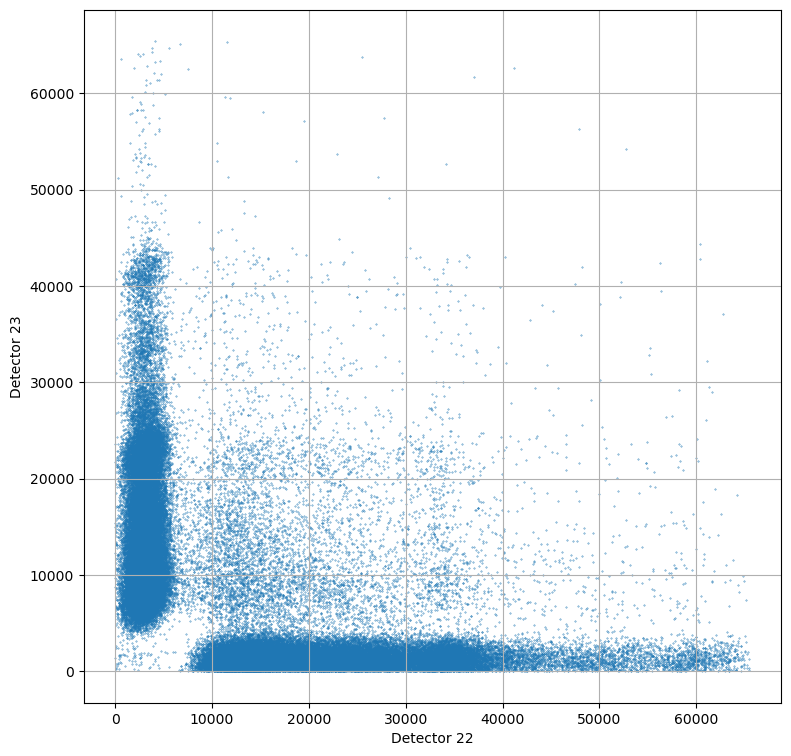

In [11]:
fig = plt.figure(figsize=(9,9))
plt.scatter(ldet22,ldet23,s=0.1,label="Data")
"""
plt.axvline(lo22,linestyle='--',color='b')
plt.axvline(hi22,linestyle='-.',color='b')
plt.axvline(lo22+hi22,linestyle=':',color='b')
plt.axhline(lo23,linestyle='--',color='r')
plt.axhline(hi23,linestyle='-.',color='r')
plt.axhline(lo23+hi23,linestyle=':',color='r')
plt.scatter(lo22,lo23,marker='>',color='k'); plt.scatter(hi22,hi23,marker='>',color='k')
plt.xlim(0); plt.ylim(0)
"""
plt.xlabel("Detector 22"),plt.ylabel("Detector 23")
plt.grid(visible=True); 
#plt.grid(visible=True,which='minor',linewidth=5,color='r') #doesn't work blargh
#plt.legend()
plt.show()

In [17]:
lNdet22 = data_lowNa[data_lowNa["word label"].str.contains("22")]["value"].reset_index(drop=True)
lNdet23 = data_lowNa[data_lowNa["word label"].str.contains("23")]["value"].reset_index(drop=True)

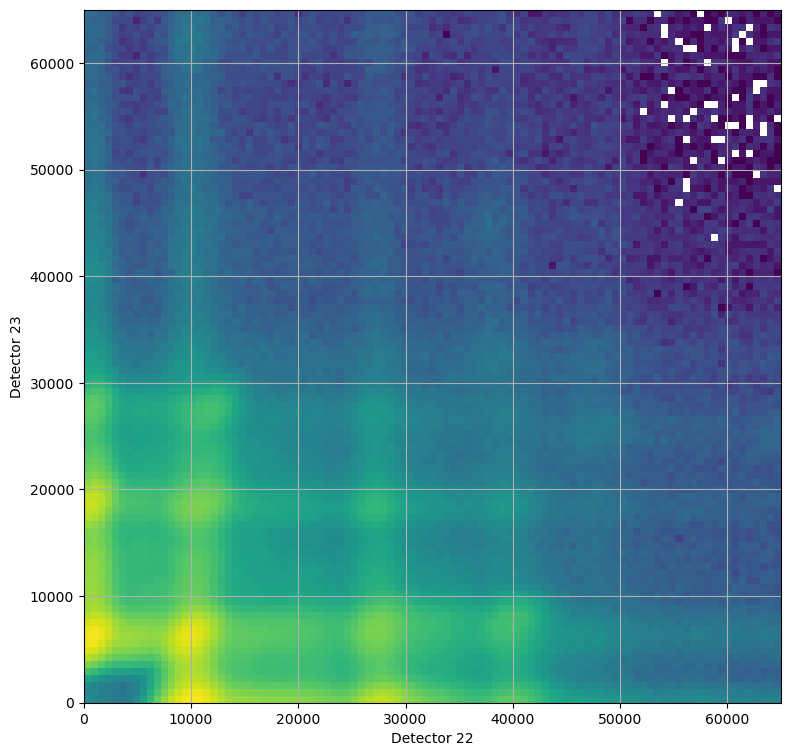

In [27]:
fig = plt.figure(figsize=(9,9))
plt.hist2d(lNdet22,lNdet23,bins=(np.linspace(0,65000,100),np.linspace(0,65000,100)),label="Data",norm="log")
"""
plt.axvline(lNlo22,linestyle='--',color='b')
plt.axvline(lNhi22,linestyle='-.',color='b')
plt.axvline(lNlo22+hi22,linestyle=':',color='b')
plt.axhline(lNlo23,linestyle='--',color='r')
plt.axhline(lNhi23,linestyle='-.',color='r')
plt.axhline(lNlo23+lNhi23,linestyle=':',color='r')
plt.scatter(lNlo22,lNlo23,marker='>',color='k'); plt.scatter(lNhi22,lNhi23,marker='>',color='k')
plt.xlim(0); plt.ylim(0)
"""
plt.xlabel("Detector 22"),plt.ylabel("Detector 23")
plt.grid(visible=True); 
#plt.grid(visible=True,which='minor',linewidth=5,color='r') #doesn't work blargh
#plt.legend()
plt.show()

In [20]:
print((len(lNdet22) - len(lNdet23))/len(lNdet22)*100,"% difference 22 - 23")

0.0 % difference 22 - 23
